This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

In [2]:
import pandas as pd
import numpy as np

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [3]:
file_name = "./data/data_000637.txt"
csv = pd.read_csv(file_name) #read the csv file
data = pd.DataFrame(csv)
N = 30000 #declare number of N to read
print('The data frame of the data = \n', pd.DataFrame(data), '\n') #print dataframe of the whole data
df = pd.DataFrame.sample(data, n =N)  #selecting N samples of data
print('N (30000) sample of data = \n', df)


The data frame of the data = 
          HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           1     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
4           1     0           64  3869200167        2760        25
...       ...   ...          ...         ...         ...       ...
1310715     1     0           62  3869211171         762        14
1310716     1     1            4  3869211171         763        11
1310717     1     0           64  3869211171         764         0
1310718     1     0          139  3869211171         769         0
1310719     1     0           61  3869211171         762        18

[1310720 rows x 6 columns] 

N (30000) sample of data = 
         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
781023     1     1            3  3869207

In [4]:
#sorting the table based on TDC_CHANNEL
data.sort_values(by="FPGA", ascending=False)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1165499,1,1,5,3869210167,3051,14
270901,1,1,27,3869202862,997,24
634407,1,1,8,3869206544,1978,26
270922,1,1,4,3869202862,1444,9
447163,1,1,139,3869204676,2056,0
...,...,...,...,...,...,...
513045,1,0,17,3869205356,576,29
513046,1,0,51,3869205356,576,0
513047,1,0,54,3869205356,578,6
513048,1,0,139,3869205356,582,0


2\. Estimate the number of BX in a ORBIT (the value 'x').

In [5]:
#the max value in BX_COUNTER is 3563, so adding one value to this will store 1 value to the orbit counter 
x = data['BX_COUNTER'].max() + 1
x


3564

3\. Find out the duration of the data taking in hours, minutes and seconds. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading the whole dataset.

In [6]:
import datetime as dt
#initial time
init_time = dt.datetime.now()
print('Time Begin = \n', init_time)

# now we can assign new column with the total time used in nanosecond for each row
data['NS_TIME'] = data.apply(lambda row : (row.ORBIT_CNT) + (row.BX_COUNTER*25) + ((row.TDC_MEAS*(25/30))), axis= 1)
data

#Ending_time 
end_time = dt.datetime.now()
print('Time End = \n', end_time)

#Process time 
duration = end_time - init_time
print('Time Taken = \n', duration)


Time Begin = 
 2021-12-03 21:29:39.866810
Time End = 
 2021-12-03 21:31:20.280615
Time Taken = 
 0:01:40.413805


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition.

In [8]:
data['abs_NSTIME'] = pd.to_timedelta(data['NS_TIME'])
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,NS_TIME,abs_NSTIME
0,1,0,123,3869200167,2374,26,3.869260e+09,0 days 00:00:03.869259538
1,1,0,124,3869200167,2374,27,3.869260e+09,0 days 00:00:03.869259539
2,1,0,63,3869200167,2553,28,3.869264e+09,0 days 00:00:03.869264015
3,1,0,64,3869200167,2558,19,3.869264e+09,0 days 00:00:03.869264132
4,1,0,64,3869200167,2760,25,3.869269e+09,0 days 00:00:03.869269187
...,...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.869230e+09,0 days 00:00:03.869230232
1310716,1,1,4,3869211171,763,11,3.869230e+09,0 days 00:00:03.869230255
1310717,1,0,64,3869211171,764,0,3.869230e+09,0 days 00:00:03.869230271
1310718,1,0,139,3869211171,769,0,3.869230e+09,0 days 00:00:03.869230396


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [9]:
datagroup = data.groupby('TDC_CHANNEL').sum()
print('Datagroup sort by TDC Channels counts = \n', datagroup, '\n')
datagroupsort = datagroup.sort_values(by="TDC_CHANNEL", ascending=False)
print ('Top 3 of the most noisy channels are = \n',datagroupsort.head(3))


Datagroup sort by TDC Channels counts = 
                HEAD   FPGA        ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
TDC_CHANNEL                                                         
1             29653  28438  114733571761779    52999263    430533   
2             34271  32669  132601566229845    61017792    499099   
3             23463  21970   90783184937635    41678301    340104   
4             28755  26403  111259024921199    51473537    416945   
5             16435  15003   63590404218625    29099531    238778   
...             ...    ...              ...         ...       ...   
129              37     35     143160633554       67804       612   
130              71     38     274713643273      124418       993   
137              68     36     263106045511      123920       748   
138              70     36     270844458243      128317       456   
139          108059  32442  418102549486957   192477704         0   

                  NS_TIME  
TDC_CHANNEL                
1   

6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit). Count also the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [10]:
#1. Counting the number of non empy orbits
nonempt = df.groupby('ORBIT_CNT').size().reset_index(name='counts')
l = len(nonempt)

print("Non Empty orbits = \n", l, "\n", nonempt)

#2. Counting the number of unique orbit
unique = df[df['TDC_CHANNEL']==139].groupby('ORBIT_CNT').size().reset_index(name='counts')
ul = len(unique)

print("Unique orbits = \n", ul, "\n", unique)

Non Empty orbits = 
 9913 
        ORBIT_CNT  counts
0     3869200167       5
1     3869200168       4
2     3869200169       3
3     3869200170       1
4     3869200171       4
...          ...     ...
9908  3869211167       5
9909  3869211168       4
9910  3869211169       5
9911  3869211170       2
9912  3869211171       1

[9913 rows x 2 columns]
Unique orbits = 
 2172 
        ORBIT_CNT  counts
0     3869200174       2
1     3869200177       1
2     3869200181       1
3     3869200185       1
4     3869200186       1
...          ...     ...
2167  3869211135       1
2168  3869211137       1
2169  3869211138       2
2170  3869211141       1
2171  3869211152       2

[2172 rows x 2 columns]


7\. **Optional:** Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

<AxesSubplot:xlabel='TDC_CHANNEL'>

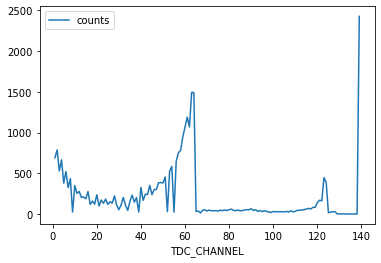

In [11]:
tdc_plot = df.groupby('TDC_CHANNEL').size().reset_index(name='counts')
tdc_plot.plot(x='TDC_CHANNEL',y='counts')